## Content
- Recap
- Variants of gradient descent
  - Vanilla GD
  - SGD
  - Batch GD
- Dimensionality reduction
- Input output relationship
- Example height vs age
- Visual understanding of PCA
- Implementing PCA
- Mathematical approach of optimizing PCA
- What is eigen vector
- PCA coding implementation

## Recap

Our classification problem was that we want to find the best lines that seperates red points from green points such that the distances between the points and the lines is maximum
- to do that we learnt about the loss function and we also learnt how to update the parameters using the gradient descent rule

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/158/original/Screenshot_2023-09-22_at_3.28.20_PM.png?1695376716)

Q. How is the varaible $\lambda$ effecting the overall loss function?
- This is very important variable and is called as **regularizer**
- $\lambda$ controls the importance of the term $\left||w\right||-1$
  - So if the value of $\lambda$ is very large then $\left||w\right||$ becomes very very important when optimizing for the loss
    - because we want the loss function to be minimum and sicne $\lambda$ is very large while optimizing we'll ensure that the $\left||w\right||$ becomes small so that when we multiply $\lambda$ with $\left||w\right||-1$ the values reduces thus reducing our loss function
  - And if the value of $\lambda$ becomes very small then the importance of the term $\left||w\right||-1$ reduces
   

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/157/original/Screenshot_2023-09-22_at_3.25.52_PM.png?1695376569)

## Variants of Gradient descent

### Vanilla gardient descent

**Q. What will be the time it takes to find the minimum value using the gradient descent update rule that we saw above? Let's say that we have 10 Million datapoints**

Hint: What is n in the formula?
  - It is the number of data poitns or the size of the datasets
- For one updation of $\bar{w}$ and $w_0$ we'll have to go through all the data points to find the summation value.
- Thus the update process of the parameters will be very very slow plus it'll require lot of computational resources.
- Thus the time complexity of this process would be $O(n)$

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/168/original/Screenshot_2023-09-22_at_4.12.42_PM.png?1695379380)

### Stochastic Gradient descent

We saw in previous class a plot of graidents which were pointing towards the minimum value of the function and do you also recall that we start randomly with a point and then we take a step towrds the minimum value

Q. Do you agree that for the vanilla gradient descent algo for each step we are looping over the entire dataset?
  - Yes

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/169/original/Screenshot_2023-09-22_at_4.41.37_PM.png?1695381109)

So to solve this one idea was that instead of taking the entire dataset let's just take only one data point at random from the dataset and quickly update our parameters
- Since we are taking just one datapoint for updation the time complexity would be **O(1)**

But there is one problem with this
- Let's say that the dataset that we have is our entire population and the point that we pick is a sample that we pick from the population

Q. If we have just one sample can we approximate the population mean?
- we will be able to find some answer but we won't be much confident if it's the right value because the number of sample is just one
- Also do you remeber that as we increase the sample size the variance was also decreasing ie the sample mean was approaching closer and closer to the population mean

There is also another problem which is for one point the direction would be towards the minima but for the next point it can take any direction and thus it would take us many iterations to reach out minimum value

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/172/original/Screenshot_2023-09-22_at_4.58.40_PM.png?1695382134)

### Batch gradient descent

So can we take laverage this concepts that we learnt in probability and statistics here?

What do we esentially want?
1. We want to move towards the right direction ie towards the minima
2. We want to reach minimum quickly

So in vanilla gradient descent it takes too much time to update each parameter whereas in SGD we update our weight vectors very quickly but it would take many stpes some in right direction and some in wrong directions before reaching the minimum value.

Also it was observerd that it is better to update the weights more oftern in comparison to increasing the intake of sample size
- thus we want to update the weights quickly and it has more importance in the real world rather than using the entier dataste for the update step
- but now if we are using just one data point to update the weights we are consuming lot of time
- So the solution to this is to use k data point together when updating the weights that way we'll be getting better directions at the same time updating the weights frequently
  - Let say if we have 100 data points in our dataset and k=10 then we'll update weights 10 times whereas if we use the SGD process then we are updating weights 100 times.
  - This is called as **Mini-Batch gradient descent** or **Batch gradient descent**

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/176/original/Screenshot_2023-09-22_at_5.55.27_PM.png?1695385543)

In the above udapte rules
- if **k=1** then we have our stochastic greadient descent
- if **1< k < n** then we have batch gradient descent
- if **k=n** then we have our vainalla gradient descent


**What is Epoch?**
- Using our entier dataset or iterating over our entier dataset to update the weights once is called as one epoch
  - So if we have 100 data points and if we have a batch size of 10 then we'll update our weights 10 times once this is referred to as 10 iterations
  - once the 10 iterations are done we have esentially gone through the entire datset thus we call that as one epoch.
  - In the next epoch we'll again go through the entire dataset with the batch size of 10

Q. If we want to perform 10 epoch where the batch size is 10 and number of data poitns is 100 then how many itertions we would have?
- 100

**Accuracy vs Step number of Gradeint descent**

when we plot accuracy vs step number
- after certain number of steps the curve plateaus ie the accuracy does not improves much no matter how hard we try.
- So this smooth curve would be for our vanilla gradient desent
- For Mini batch SGD it'll be less smoother there will be lot of variations along the way
- For SGD we'll have too much variance along the way compared to mini batch sgd

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/182/original/Screenshot_2023-09-22_at_6.21.57_PM.png?1695387132)

## Dimensionality reduction




We had written our dataset mathematically which is $D=\{x_i,y_i: x_i \in \mathbb{R}^d \}_{i=1}^n$
- Here d is the dimension of the data point
- We can;t visualize more then 3 dimensions

Let's see what are the problem with high dimensions ie as dimensions increases
- Visualization is tough
- Training time increases
  - We saw a calculation in previous classes that when we increased only one feature it would take 2 years for the computation.
- Computation resouces requirement increases
- If we have too many dimensions the math required to solve becomes to complex

So dimensionality reduction helps us solve this problems one such algorithm that we'll study is **Principal component analysis**

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/185/original/Screenshot_2023-09-22_at_7.08.18_PM.png?1695389914)

Q. Don't you think when we say that we want to reduce the dimensions of the data esentially we'll be lossing our information of the dataset?
- Yes
- Thus when we'll learn about PCA we'll look at how smartly it reduces the dimensions without loosing the essence of the data
  - here the term essesnce of the data meands that we are not loosing out much of the information present in the dataset

## Input Output relationship

Let's see on a high level what does PCA does exactly

Let's consider PCA as a black box model for now ie we don't know what it does internally
- So the input to this PCA is a dataset with data points belonging to d dimensions
- And the output would we another dataset where the datapoint belongs to d' dimensions which is different from d

Q. Choose the correct option for d'
1. d'>d
2. d'< d
3. d'= d
- Correct answer is 2

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/186/original/Screenshot_2023-09-22_at_7.18.26_PM.png?1695390522)

## Example Height vs Age

For PCA to work perfectly there is a condition that it needs to be satisfied let's understand what that condition is

Let's see we have a plot of height vs age
- when we are babies we have a lesser height and as we grow our height incerase upto a certain age after that our height stops increasing

Q. If were to find out pearson coorrealtion value would it be a big value or a low value?
- There isin't a string correlation between height and age because it is a non linear function
- So in such cases dimensionaloity reduction is not possible without losing the essence of data.
- There should be strong correalation between the 2 variables for dimensionality reduction to work


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/188/original/Screenshot_2023-09-22_at_7.34.44_PM.png?1695391502)

Dimensionaloty reduction works well when we have strong correlation as shown below for height vs weight plot
- here height and weight are linealry correlated with each other

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/189/original/Screenshot_2023-09-22_at_7.40.19_PM.png?1695391844)

## Visual understanding of PCA

Now let's learn the interals of what a PCA does
- First is we'll shift the origin to the mean values of the dataset ie we'll find out what the mean height and mean weight and we can represent this mean point as $\bar{m}$

Q. How do we shift the origin to the mean point $\bar{m}$
- We subtract each of our points in the dataset with the mean point that way the original mean points cancel out and we'll get a new origin which sits at the mean point $\bar{m}$

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/190/original/Screenshot_2023-09-22_at_7.43.13_PM.png?1695392009)

We can now create a norm vector which is perpendicular to our Red line

Next what we want to do is we want to rotate our original axis such that they align with the red line.

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/191/original/Screenshot_2023-09-22_at_7.48.43_PM.png?1695392340)

We'll get something like as shown below

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/194/original/Screenshot_2023-09-22_at_7.49.30_PM.png?1695392386)

Let's call this new axis as $x_{new}$ and $y_{new}$

Next let's just focus on the green points and the new axis where do you think most of the information lies ?
- x axis, that is because let's say that the points to the left of the vertical black lines are peoples who had less height and less weight
- and points to the right of the vertical black lines are peoples who had more height and more weight
- so if we project them onto the x we'll still be able to differentiate between this 2 groups
- whereas if we were to project them onto the new y axis it would be very hard to differentiate between these 2 groups
- Mathematically we want to check what is the variance along the x axis and variance along the y axis
  - And we want to select that axis which has the maximum variance
- Thus we can achieve dimensionality reduction by forgetting the y axis

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/197/original/Screenshot_2023-09-22_at_8.04.09_PM.png?1695393265)

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/219/original/Screenshot_2023-09-22_at_11.25.36_PM.png?1695405349)

When we have 2 varaibles which are not strongly correlated then in that case the variances across the 2 new axis will come out to be similar hence we won't be able to choose the axis that preserves maximum information hence PCA algorithm does not work very well in this case

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/220/original/Screenshot_2023-09-22_at_11.35.03_PM.png?1695405920)

## Implementing PCA

**Step1: Column standardization**
- For every column or feature we subtract the data point value from the mean of that feature and divide it by the standard deviation of that feature and we do this for all the feature present in the dataset

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/222/original/Screenshot_2023-09-22_at_11.42.57_PM.png?1695406572)

**Step2**
- Now when we were looking at projecting the data points onto the new axis esentially we were looking for a vector u on which we can project all the data points and wherever that is maximum we'll consider that
- Thus this step is about finding a vector $\bar{u}\space$ such that the vairance of $\bar{x}$ (our original datapoints) along the vector $\bar{u}\space$ is maximized

Q. How do we find the projection of a vector $\bar{x_i}$ onto new vector $\bar{u}$?
- By performing the dot product between the $\bar{x_i}$ and $\bar{u}$ and dividing it by the norm of the $\bar{u}$
- $\frac{\bar{x_i}\bar{u}}{\left||u\right||}$ or we can also write as $x_i.\hat{u} $
- So after projecting on the new vector we'll be getting the distance of that point from the mean point or the new origin that we shifted to the mean point

Q. Next we want to find the variance along the new axis how can we do that?let's denote the new projected points as $x'$
thus $x'=\frac{\bar{x_i}\bar{u}}{\left||u\right||}$
- Formula for variance is Var=$\frac{1}{n}\sum{(x_i-\mu)}^2$
- here $x_i$ is $x'$ thus our formula will become
  - Var=$\frac{1}{n}\sum{(\frac{\bar{x_i}\bar{u}}{\left||u\right||}-\mu)}^2$
- But do you agree that $\mu$ would be 0 because we have shifted our origin to the mean point and this is called as standardizing the data

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/223/original/Screenshot_2023-09-23_at_12.08.46_AM.png?1695407942)

Now we convert this into a constraint problem and then using lagrange multipler to convert that into an unconstraint problem

Note: that if $\left||u\right||=1$ then $\left||u\right||^2=1$

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/224/original/Screenshot_2023-09-23_at_12.13.28_AM.png?1695408222)

Now we can either solve this optimization problem using gradient ascent or we have a mathematical approach to solve this optimization problem as it is more efficient

## Mathematical approach of optimising PCA

Let's learn about the mathematical approach
- First thing is to change how we are looking at $(\bar{x}^T\bar{u})^2$
- We have our dataset D where $x_i$ belongs to a D dim space and we have n data points
- Thus we'll represent each row of our dataset as a row vector ie for $i^{th}$ data point it'll be $x_i^T$ we'll represent this dataset a matrix of dimension $n*d$ and this matrix is called as a **data matrix** and let's call this as X
- Next we'll take our data matrix and multiply it with our vector u which is a column vector
  - Note that $\bar{u}$ is a d dimensional
- So when we multiply X with u matrix the resultant matrix that would have a shape of $n*1$, let's call this as vector $v$
  - First row entry in the new vector $v$ would be nothing but the dot product between first row of X matrix and the u vector.
  - Now when we compute the norm of the $v$ vector we'll esentially be computing  $\sum_{i=1}^n(\bar{x}^T\bar{u})^2$ which is the first term of our optimization problem

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/278/original/Screenshot_2023-09-23_at_8.25.05_PM.png?1695480922)

Let's redefine our Optimization problem in terms of $X.\bar{u}$
- Our new optimziation problem is
  - $\bar{u}^*=argmax_{\bar{u}}\frac{1}{n}(\bar{v}^T\bar{v})+\lambda (\left||u\right||^2-1)$
    - Here we have represented $\left||v\right||^2$ as $\bar{v}^T\bar{v}$ it means the same thing
  - If we simply $\bar{v}^T\bar{v}$ in terms of $X$ and $\bar{u}$ then
    - $\bar{v}^T\bar{v}=(X\bar{u})^T.X\bar{u}$
    - We can rewrite this as $\bar{v}^T\bar{v}=\bar{u}^TX^T.X\bar{u}$

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/283/original/Screenshot_2023-09-23_at_9.00.18_PM.png?1695483030)

Why did we do all of this?
- So that computing gradients becomes easier

Gradient of the function $f(\bar{u})=u^TSu\space$ where S is any matrix then $\nabla_{\bar{u}}f(\bar{u})=(S+S^T)\bar{u}$
- we can also write this as $\nabla_{\bar{u}}f(\bar{u})=\bar{u}^T(S+S^T)$
- Note that we are taking this as a fact and not looking at the proof of this as proving this will consume a lot of time.

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/281/original/Screenshot_2023-09-23_at_8.44.57_PM.png?1695482111)

Now we can call the entier equation after the $argmax$ as $f(\bar{u})=\frac{1}{n}\bar{u}^TX^TX\bar{u}+\lambda(\left||\bar{u}\right||-1)$
- We can represent $\left||\bar{u}\right||^2$ as $\bar{u}^T\bar{u}$
- So here $X^TX$ would be our matrix S from fact 1
- So using Fact1 let's compute the gradient of $f(\bar{u})$ would be
  - $\nabla_{\bar{u}}f(\bar{u})=\frac{1}{n}((X^TX)+(X^TX)^T)\bar{u}+\lambda (2\bar{u})$
- Now (A.B)^T is equal to A^T.B^T using this we can rewrite $(X^TX)^T$ as $X^TX$
- Thus the final equation becomes $\nabla_{\bar{u}}f(\bar{u})=\frac{2}{n}(X^TX)\bar{u}+\lambda (2\bar{u})$


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/284/original/Screenshot_2023-09-23_at_9.03.24_PM.png?1695483220)

So our gradient equation is
- $\nabla_{\bar{u}}f(\bar{u})=2(\frac{1}{n}X^TX\bar{u}+\lambda\bar{u})$
- to find the minima or maxima we'll equation the greaident to 0
- Thus $2(\frac{1}{n}X^TX\bar{u}+\lambda\bar{u})=0$
  - Here 2 will go on the other side cancel out and shifting $\lambda \bar{u}$ and $n$ to other side our equation will be
    -  $X^TX\bar{u}=-n\lambda\bar{u}$
  - We can represet $-n\lambda$ as $\lambda'$
    - $(X^TX)\bar{u}=\lambda'\bar{u}$
  - This equation represents the eigen value eigen vector expression

So this equation tells us that the vector $\bar{u}$ which maximizes $f(\bar{u})$ is the one which satisfies equation 1

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/289/original/Screenshot_2023-09-23_at_9.20.02_PM.png?1695484219)

By observing equation 1 we notice that $\bar{u}$ is nothing but eigen vector of the matrix $X^TX$

## What is eigen vector

For any square matrix S if we find an $\bar{x}$ such that $S\bar{x}=\lambda\bar{x}$ then $\bar{x}$ is said to be an **eigen vector**
- Here square matrix means number of rows equals number of columns
- Word eigen comes from the german word same or identity

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/292/original/Screenshot_2023-09-23_at_10.01.35_PM.png?1695486712)

Let's say in our 2D space we have a vector $\bar{x}$ and we multiply it with a square matrix S which is of size $d*d$ the result is another  vector $\bar{v}$ of size $d*1$
- $\bar{v}=S.\bar{x}$
- If $S.\bar{x}=\lambda.\bar{x}$ where $\lambda$ is a number then $\bar{v}=\lambda.\bar{x}$
- which means that the direction of $\bar{v}$ will be same as $\bar{x}$ thus $\bar{x}$ is a eigen vector because when we take vector x and multiply it with a matrix s the new vector still points in the same direction as the vector x
- Eigen vectors are the property of the matrix S where when we multiply a matrix with a vector if the direction remains the same and the magnitude of the resultant vector changes then the vector that we multiply with the matrix is the eigne vector

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/293/original/Screenshot_2023-09-23_at_10.20.22_PM.png?1695487836)

Why did we started this whole thing?
- the problem that we wanted to solve was that we wanted to find a vector $\bar{u}$ such that the variance along the $\bar{x}$ is maximized
- So by doing all this math we have proven that this vector $\bar{u}$ is nothing but the eigen vector

So to solve the problem of finding a vector $\bar{u}$ such that the variance is maximized we'll first have to find an eigen vector
- To find this we'll use numpy we have a function which gives us eigen vectors for a given matrix

Now each matrix has many eigen vectors and each eigen vector has an associated eigen value so we pick that eigen vector corresponding to the maximum eigen value for our $\bar{u}$

So onces we have the eigen values and the eigen vecrtor of the matrix we simply have to sort the eigen values in descending order and select the eigen vector with the highest eigen value.

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/294/original/Screenshot_2023-09-23_at_10.31.40_PM.png?1695488516)

We got our vector $\bar{u}$ which maximizes our variance now how to find other directions?
- So if we want to reduce the dimensions from d to d' we simply pick the first d' eigen vector with the largest corresponding eigen value
- So let's say we have a 3*3 matrix it'll have $(x_1, \lambda_1)$,$(x_2, \lambda_2)$, $(x_3, \lambda_3)$
  - Because for any square matrix the maximum number of eigen vector will be equal to the dimension of the matrix
  - Here $x_1,x_2,x_3$ are eigen vectors and $\lambda_1,\lambda_2,\lambda_3$ are eigen values
- So we'll arrange this eigen values in descending order and let say that we want to reduce it to 2 dimensions so we'll pick 2 eigen vector $x_1$ and $x_2$
- And we'll use this as our new axis on which we'll project our points to find the new coordinates of the points.


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/295/original/Screenshot_2023-09-23_at_10.46.25_PM.png?1695489397)

Next let's see how to project the old points which are present in d dimensional space to d' dimsionsal space
- we'll compute the projection of each data point along the new axis ie vectors $\bar{u}\in d'$ ie $\bar{u_1}$, $\bar{u_2}$...$\bar{u_d}'$ where vector

The last thing that we want to compute is how much of information have we captured or retained from the original dataset present in d dimension
- to do that $\frac{\lambda_1+\lambda_2+..\lambda_d'}{\sum_{i=1}^d\lambda_i}$
- So based on the previous example where we saw that we were picking 2 eigen vector with eigen values of 0.5 and 0.3 then that means that 80% of information we have retained and 20% of it was lost when we transformed from 3D to 2D
- Thus to choose the d' we'll always look at what percentage of information lost or retained is acceptable based on that we'll take that many eigen vector such that the information retained is within the acceptable value

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/296/original/Screenshot_2023-09-23_at_11.01.29_PM.png?1695490305)

## PCA coding implementation

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!gdown 16elpyaPZhS63ibzIdetEjZhCO4FpVSZu

Downloading...
From: https://drive.google.com/uc?id=16elpyaPZhS63ibzIdetEjZhCO4FpVSZu
To: /content/pca_2d_data.csv
100% 778/778 [00:00<00:00, 2.28MB/s]


In [ ]:
data = pd.read_csv('/content/pca_2d_data.csv')
data.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


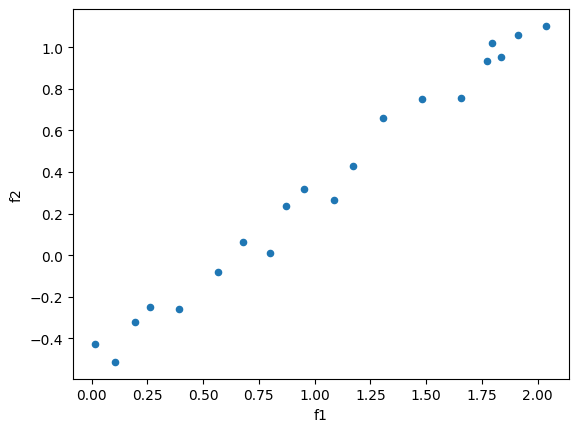

In [ ]:
data.plot(x='f1', y='f2', kind='scatter')
plt.show()

[37.85422556  0.14577444]


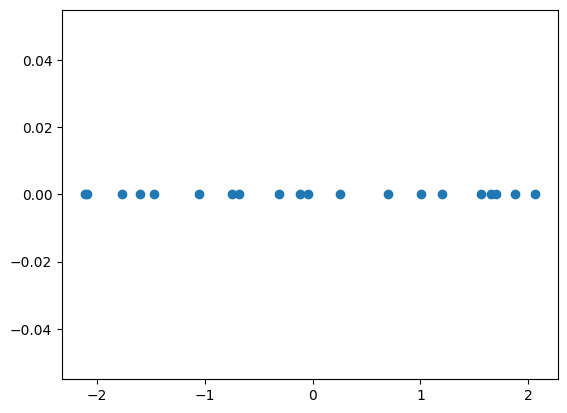

In [ ]:
## Implement PCA!!
# Step 1: Column standardization

mu = data.mean(axis = 0)

std = data.std(axis = 0)

X_st = (data - mu)/std

# Step 2: Eigenvalue decomposition
cov_X_st = np.matmul(X_st.values.T, X_st.values)
eigenvalues, eigenvectors = np.linalg.eig(cov_X_st)

print(eigenvalues)

# Step 3: Reduce the dimension! Choose the eigenvector corresponding to the largest eigenvalue
max_idx = np.argmax(eigenvalues)
X_prime = eigenvectors[:, max_idx].dot(X_st.T)
X_prime_reduced = X_prime

# Step 4: Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros(20))
plt.show()

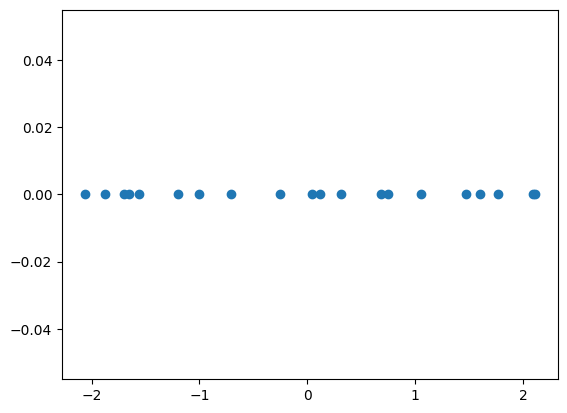

In [ ]:
#PCA implementation using sklearn library
from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=2)

X_p = pca.fit_transform(X_st)

plt.figure()
plt.scatter(X_p[:, 0], np.zeros(20))
plt.show()